In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/BostonHousing2.csv")

In [3]:
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [4]:
df.shape

(506, 17)

In [5]:
df.isnull().sum()

TOWN       0
LON        0
LAT        0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
TOWN       506 non-null object
LON        506 non-null float64
LAT        506 non-null float64
CMEDV      506 non-null float64
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13), int64(3), object(1)
memory usage: 67.3+ KB


In [7]:
df['CMEDV'].describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: CMEDV, dtype: float64

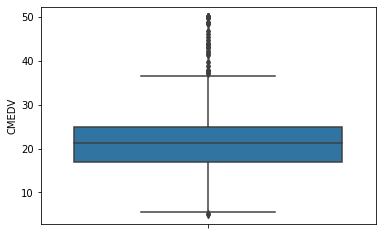

In [8]:
sns.boxplot(data=df ,y='CMEDV')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029DED389FD0>,
      dtype=object)

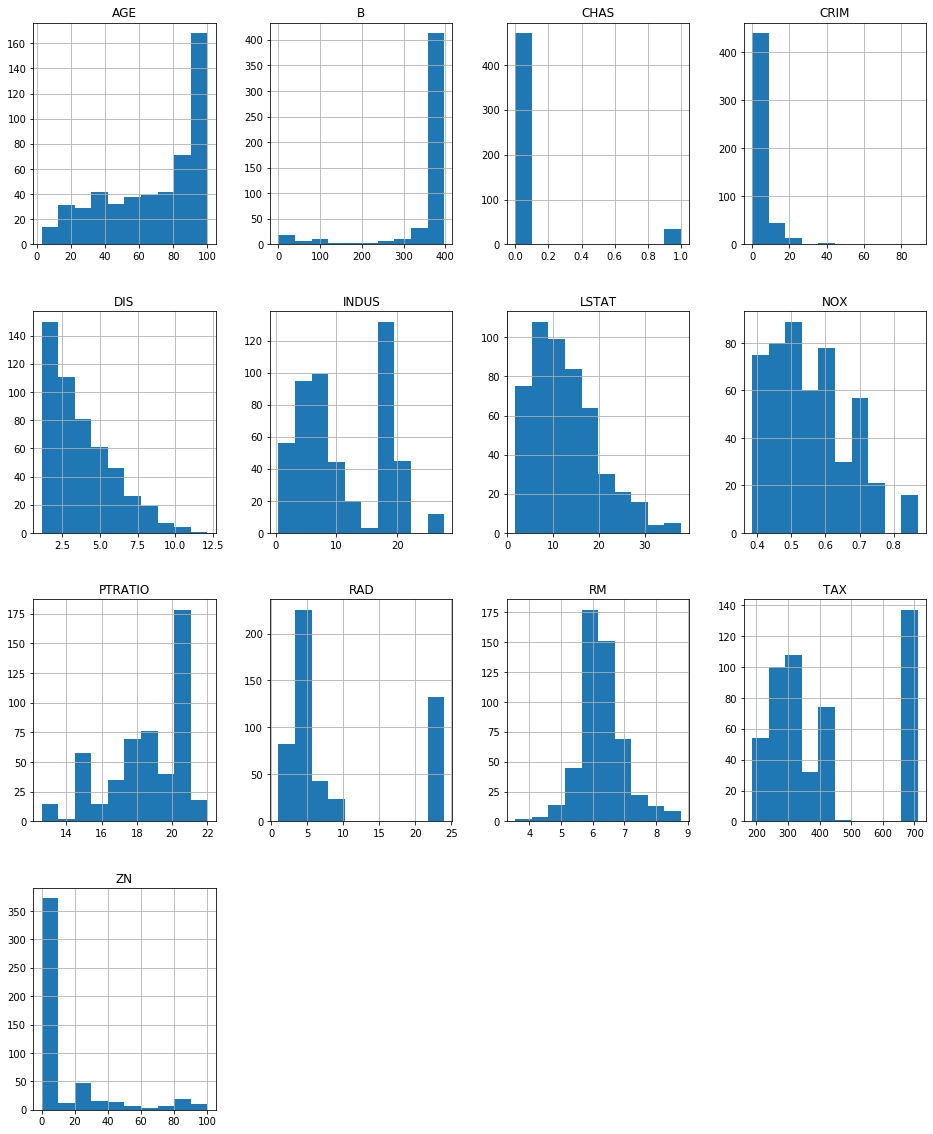

In [16]:
numerical_columns = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 
                     'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 
                     'B', 'LSTAT']]

numerical_columns.hist(figsize=(16,20))

In [20]:
cols = ['CMEDV', 'CRIM', 'ZN', 'INDUS', 
        'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
        'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

corr = df[cols].corr(method='pearson')
corr

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CMEDV,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.429300,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655,0.334861,-0.740836
CRIM,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175663,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.429300,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.696304,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.377999,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249315,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.384766,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


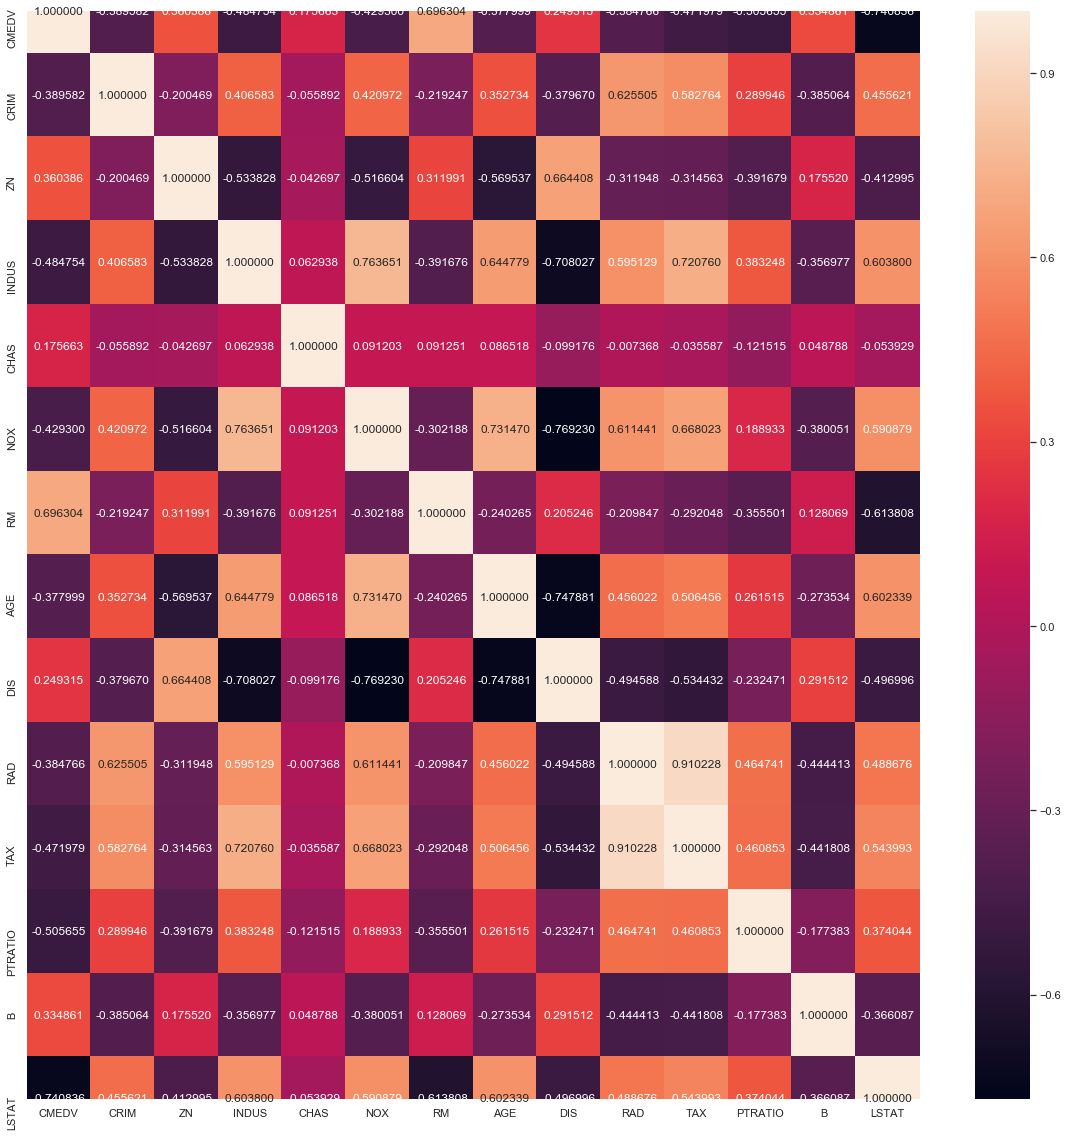

In [25]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.0)
sns.heatmap(data=corr, annot=True, fmt='2f', yticklabels=cols, xticklabels=cols)

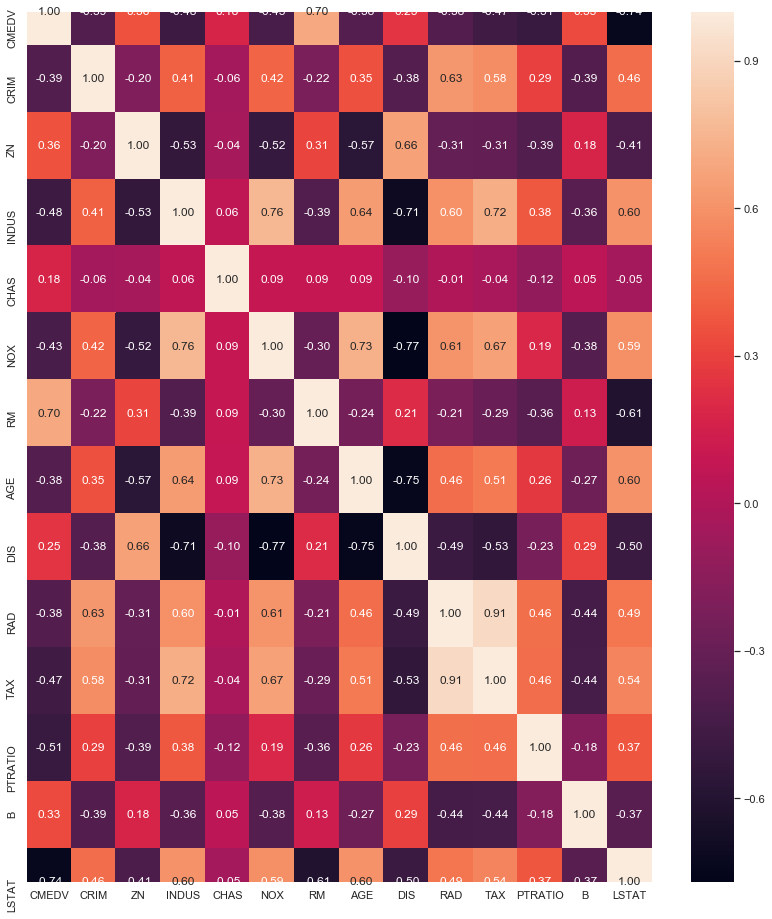

In [42]:
plt.figure(figsize=(14,16))
sns.set(font_scale=1.0) # x축, y축에 표기될 칼럼 이름들의 크기
plt.tight_layout() # 박스 안에 숫자가 딱 맞게 출력되게 하기 위해
sns.heatmap(data=corr, 
            annot=True,
            annot_kws={'size':12}, # 안에 표시될 숫자의 크기
            fmt='.2f', # 소수점 두자기까지 표기
            yticklabels=cols, 
            xticklabels=cols)

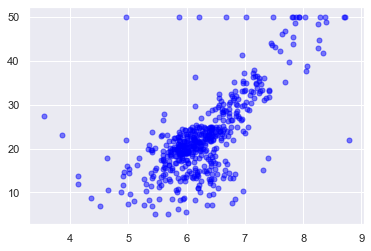

In [46]:
plt.plot('RM', 'CMEDV', data=df, 
         linestyle='none', marker='o', markersize=5, color='blue', alpha=0.5)
plt.tiltle='스캐터 플롯'
plt.xlabel='RM'
plt.ylabel='CMEDV'
plt.show()

# alpha는 투명도

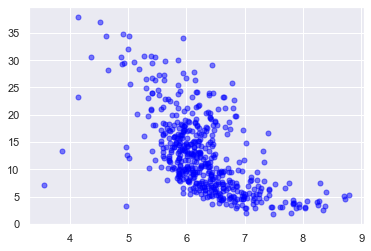

In [47]:
plt.plot('RM', 'LSTAT', data=df, 
         linestyle='none', marker='o', markersize=5, color='blue', alpha=0.5)
plt.tiltle='스캐터 플롯'
plt.xlabel='RM'
plt.ylabel='LSTAT'
plt.show()

In [48]:
지역별로 탐색

SyntaxError: invalid syntax (<ipython-input-48-1bf364032c7e>, line 1)

In [53]:
df['TOWN'].value_counts().head()

Cambridge            30
Boston Savin Hill    23
Lynn                 22
Boston Roxbury       19
Newton               18
Name: TOWN, dtype: int64

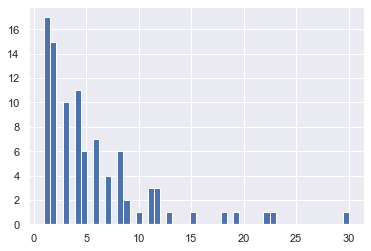

In [55]:
df['TOWN'].value_counts().hist(bins=50)

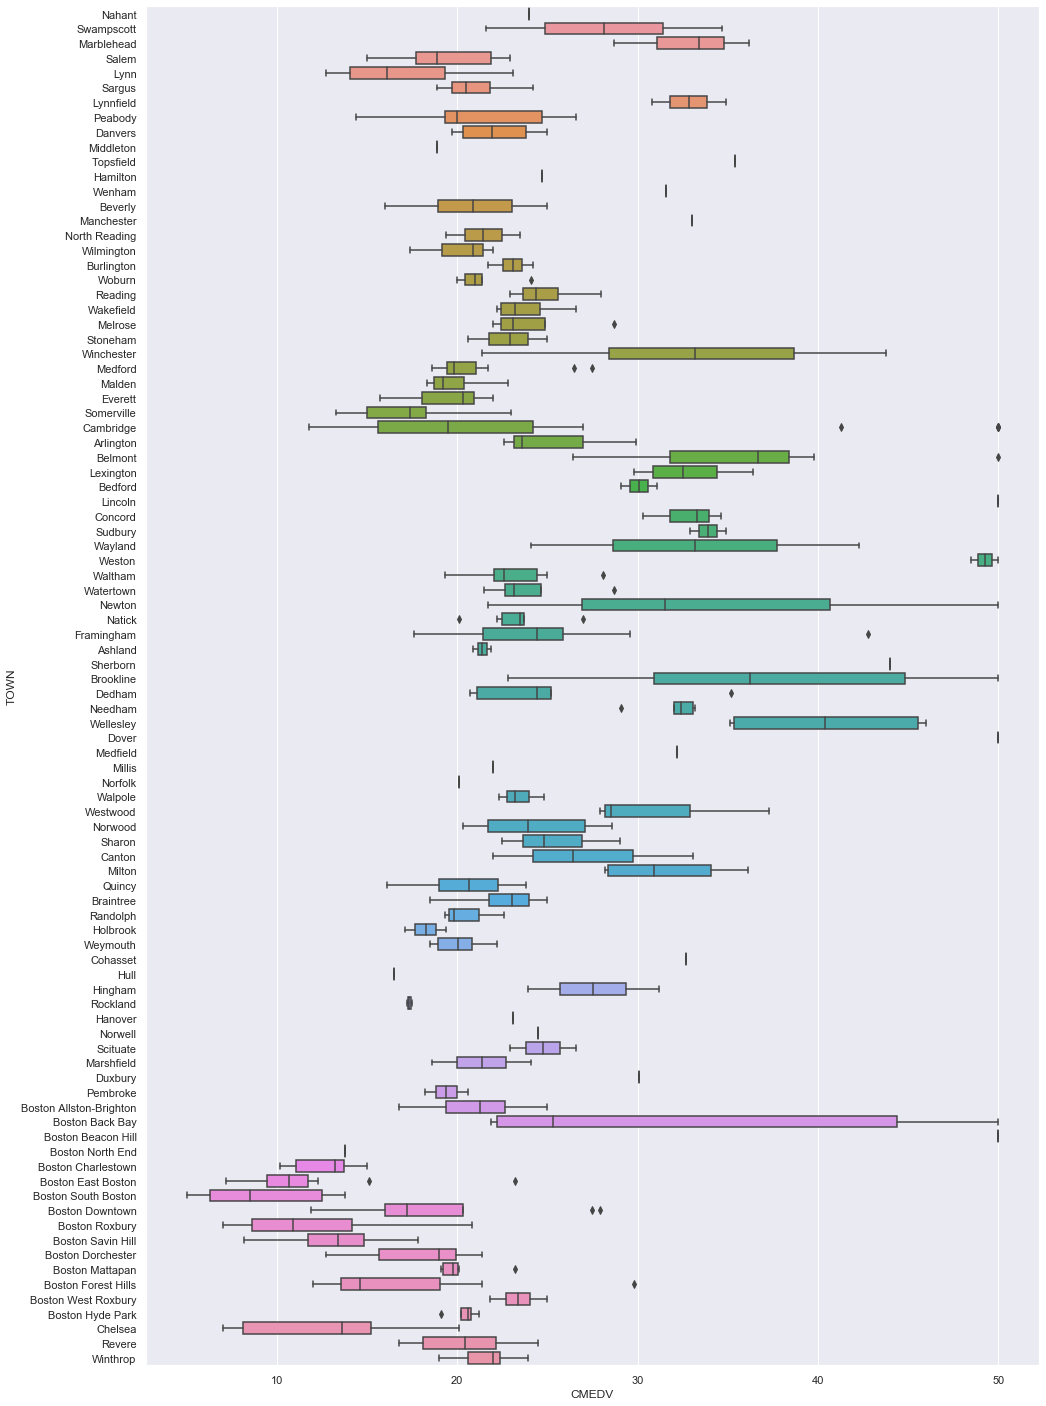

In [58]:
plt.figure(figsize=(16,25))
sns.boxplot(x='CMEDV', y='TOWN', data=df)

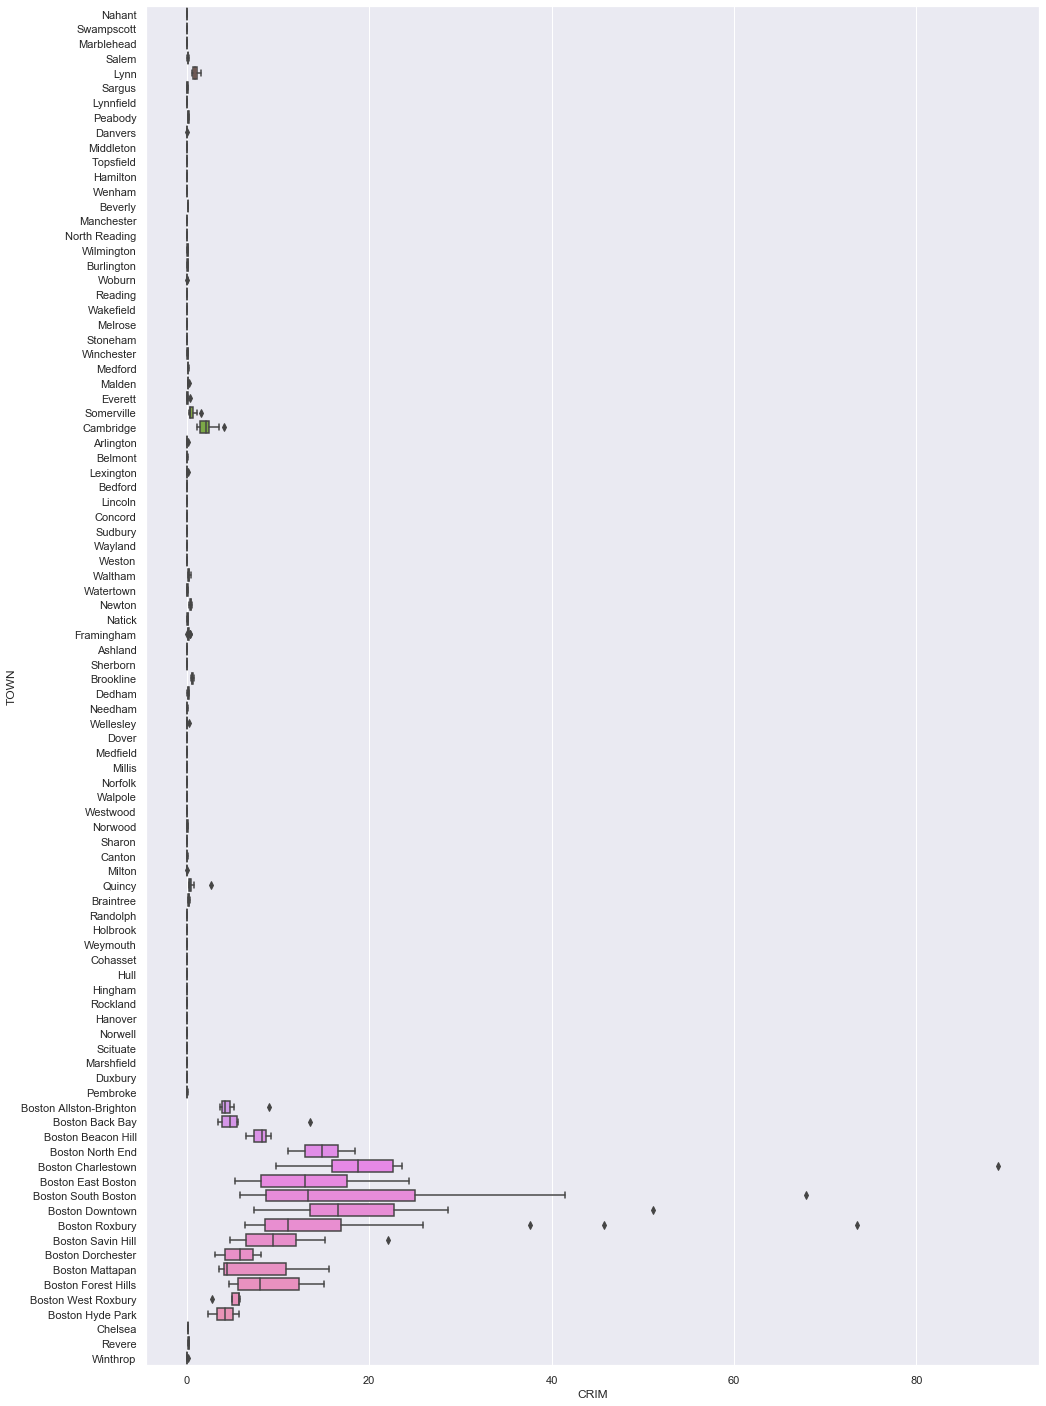

In [59]:
plt.figure(figsize=(16,25))
sns.boxplot(x='CRIM', y='TOWN', data=df)

# 회귀 분석

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_columns = ['ZN', 'INDUS', 'CHAS', 'NOX', 
                     'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 
                     'B', 'LSTAT']
df[scale_columns] = scaler.fit_transform(df[scale_columns])
df[scale_columns].head()

# 제트값 만들기 (범위가 제각각이었던 값들을 비슷한 범위의 수치로 조정하는 방법)

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


▼데이터셋 분리

In [67]:
from sklearn.model_selection import train_test_split

In [74]:
x = df[scale_columns]
y = df['CMEDV']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=33)

# test_size=0.2 -> test 데이터가 20% 차지, train 데이터가 80%를 차지
# random_state=33 -> 씨드를 부여

In [77]:
print(x_train.shape)
print(y_train.shape)

(404, 12)
(404,)


In [81]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt

In [85]:
# *******************************************************
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)

# fit() 함수는 lr 오브젝트의 수식에 괄호 안 트레인 셋을 적용하여 학습시키는 함수이다.

In [86]:
# 모델에 의한 w, b 값을 확인하기
print(lr.coef_)

[ 1.09378402  0.27294228  0.81129637 -1.68599591  2.85122843 -0.05174006
 -3.11186779  2.28545712 -2.3016214  -1.76058629  0.91893869 -4.38633471]


In [90]:
plt.figure(figsize=(16,20))
coefs=lr.coef_.tolist()
coefs_series = pd.Series(coefs)

<Figure size 1152x1440 with 0 Axes>

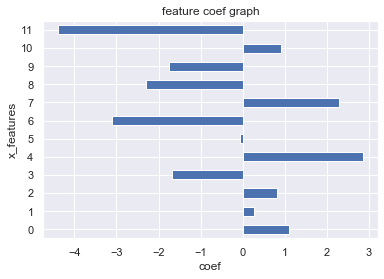

In [98]:
x_labels = scale_columns
ax = coefs_series.plot.barh()
ax.set_title('feature coef graph')
ax.set_xlabel('coef')
ax.set_ylabel('x_features')
plt.show()